# Data Processing

In [27]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from scipy.stats import norm

# 1. Read Dataset
### 1.1 Load the dataset (e.g., using pandas.read_csv()).

In [28]:
df = pd.read_csv('Datasets/Employee.csv')

### 1.2 Inspect the data structure (.head(), .info(), .describe()).

In [29]:
df.head()

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot
0,Bachelors,2017,Bangalore,3,34,Male,No,0,0
1,Bachelors,2013,Pune,1,28,Female,No,3,1
2,Bachelors,2014,New Delhi,3,38,Female,No,2,0
3,Masters,2016,Bangalore,3,27,Male,No,5,1
4,Masters,2017,Pune,3,24,Male,Yes,2,1


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4653 entries, 0 to 4652
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Education                  4653 non-null   object
 1   JoiningYear                4653 non-null   int64 
 2   City                       4653 non-null   object
 3   PaymentTier                4653 non-null   int64 
 4   Age                        4653 non-null   int64 
 5   Gender                     4653 non-null   object
 6   EverBenched                4653 non-null   object
 7   ExperienceInCurrentDomain  4653 non-null   int64 
 8   LeaveOrNot                 4653 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 327.3+ KB


In [31]:
df.describe()

,JoiningYear,PaymentTier,Age,ExperienceInCurrentDomain,LeaveOrNot
count,4653.000000,4653.000000,4653.000000,4653.000000,4653.000000
mean,2015.062970,2.698259,29.393295,2.905652,0.343864
std,1.863377,0.561435,4.826087,1.558240,0.475047
min,2012.000000,1.000000,22.000000,0.000000,0.000000
25%,2013.000000,3.000000,26.000000,2.000000,0.000000
50%,2015.000000,3.000000,28.000000,3.000000,0.000000
75%,2017.000000,3.000000,32.000000,4.000000,1.000000
max,2018.000000,3.000000,41.000000,7.000000,1.000000


# 2. Explore the Data
## 2.1 Basic Exploration:
### 2.1.1 Print the first few rows to understand the structure of the dataset.

In [32]:
df.head()

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot
0,Bachelors,2017,Bangalore,3,34,Male,No,0,0
1,Bachelors,2013,Pune,1,28,Female,No,3,1
2,Bachelors,2014,New Delhi,3,38,Female,No,2,0
3,Masters,2016,Bangalore,3,27,Male,No,5,1
4,Masters,2017,Pune,3,24,Male,Yes,2,1


## 2.2 Check Datatypes:
### 2.2.1 Identify numerical and categorical columns.

In [33]:
numericalColumns = df.select_dtypes(include=['number']).columns
categoricalColumns = df.select_dtypes(include=['object']).columns

In [34]:
numericalColumns

Index(['JoiningYear', 'PaymentTier', 'Age', 'ExperienceInCurrentDomain',
       'LeaveOrNot'],
      dtype='object')

In [35]:
categoricalColumns

Index(['Education', 'City', 'Gender', 'EverBenched'], dtype='object')

### 2.2.2 Convert categorical columns to the category datatype for better memory efficiency.

In [36]:
df[categoricalColumns] = df[categoricalColumns].astype('category')
df.dtypes

Education                    category
JoiningYear                     int64
City                         category
PaymentTier                     int64
Age                             int64
Gender                       category
EverBenched                  category
ExperienceInCurrentDomain       int64
LeaveOrNot                      int64
dtype: object

## 2.3 Categorical Column Analysis:
### 2.3.1 Display the number of unique categories in each categorical column.

In [37]:
categoricalColumns = df.select_dtypes(include=['category']).columns
df[categoricalColumns].nunique()

Education      3
City           3
Gender         2
EverBenched    2
dtype: int64

## 2.4 Missing Values:
### 2.4.1 Check for missing values in each column.

In [38]:
missingValues = df.isnull().sum()
missingValues

Education                    0
JoiningYear                  0
City                         0
PaymentTier                  0
Age                          0
Gender                       0
EverBenched                  0
ExperienceInCurrentDomain    0
LeaveOrNot                   0
dtype: int64

### 2.4.2 Calculate the percentage of missing values.

In [39]:
missingPercentage = (missingValues / len(df)) * 100
missingPercentage

Education                    0.0
JoiningYear                  0.0
City                         0.0
PaymentTier                  0.0
Age                          0.0
Gender                       0.0
EverBenched                  0.0
ExperienceInCurrentDomain    0.0
LeaveOrNot                   0.0
dtype: float64

In [40]:
pd.DataFrame(data=[missingValues, missingPercentage], index=['Missing Values', 'Missing Percentage'])

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot
Missing Values,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Missing Percentage,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# 3. Handle Missing Values
## 3.1 High Null Ratios:
### 3.1.1 Drop columns where the null-value percentage is too high (e.g., >50%).

In [41]:
columnsToDrop = missingPercentage[missingPercentage > 50].index
df.drop(columns=columnsToDrop, inplace=True)

## 3.2 Categorical Columns:
### 3.2.1 Fill missing values with the mode of the column.

In [42]:
categoricalColumns = df.select_dtypes(include=['category']).columns
for column in categoricalColumns:
    df.fillna({column: df[column].mode()[0]}, inplace=True)

### 3.2.2 Visualize the distribution of each column.

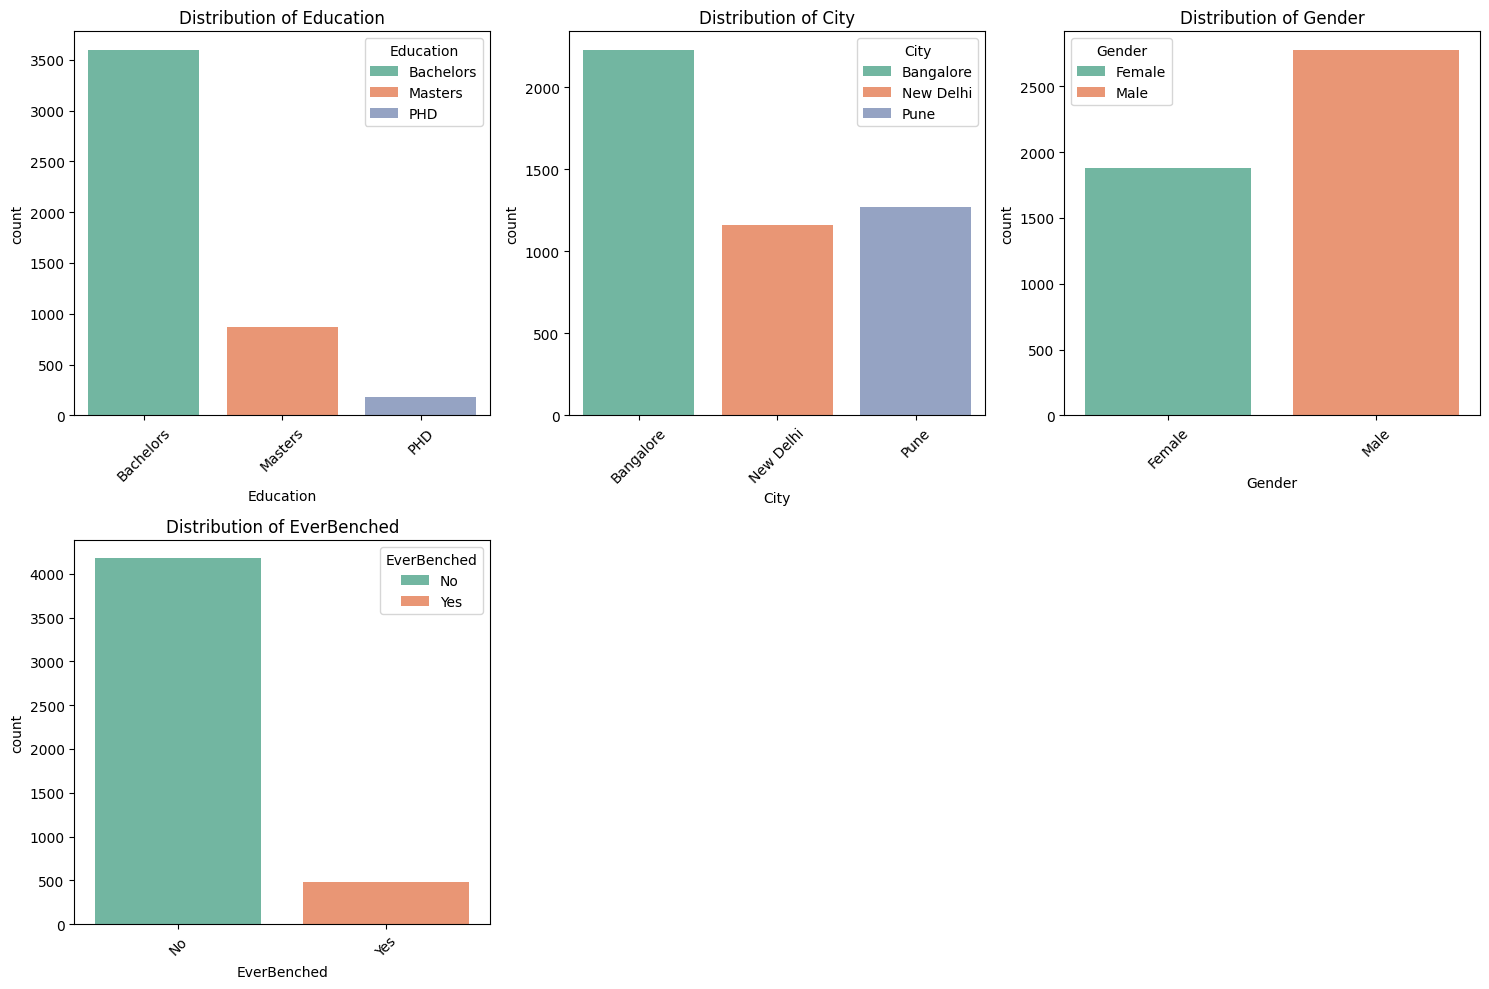

In [43]:
plt.figure(figsize=(15, 10))
for index, column in enumerate(categoricalColumns):
    plt.subplot((len(categoricalColumns) + 2) // 3, 3, index + 1)
    sns.countplot(data=df, x=column, hue=column, legend=True, palette="Set2")
    plt.title(f'Distribution of {column}')
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## 3.3 Numerical Columns:
### 3.3.1 Visualize the distribution of each column (e.g., using histograms or skewness statistics).

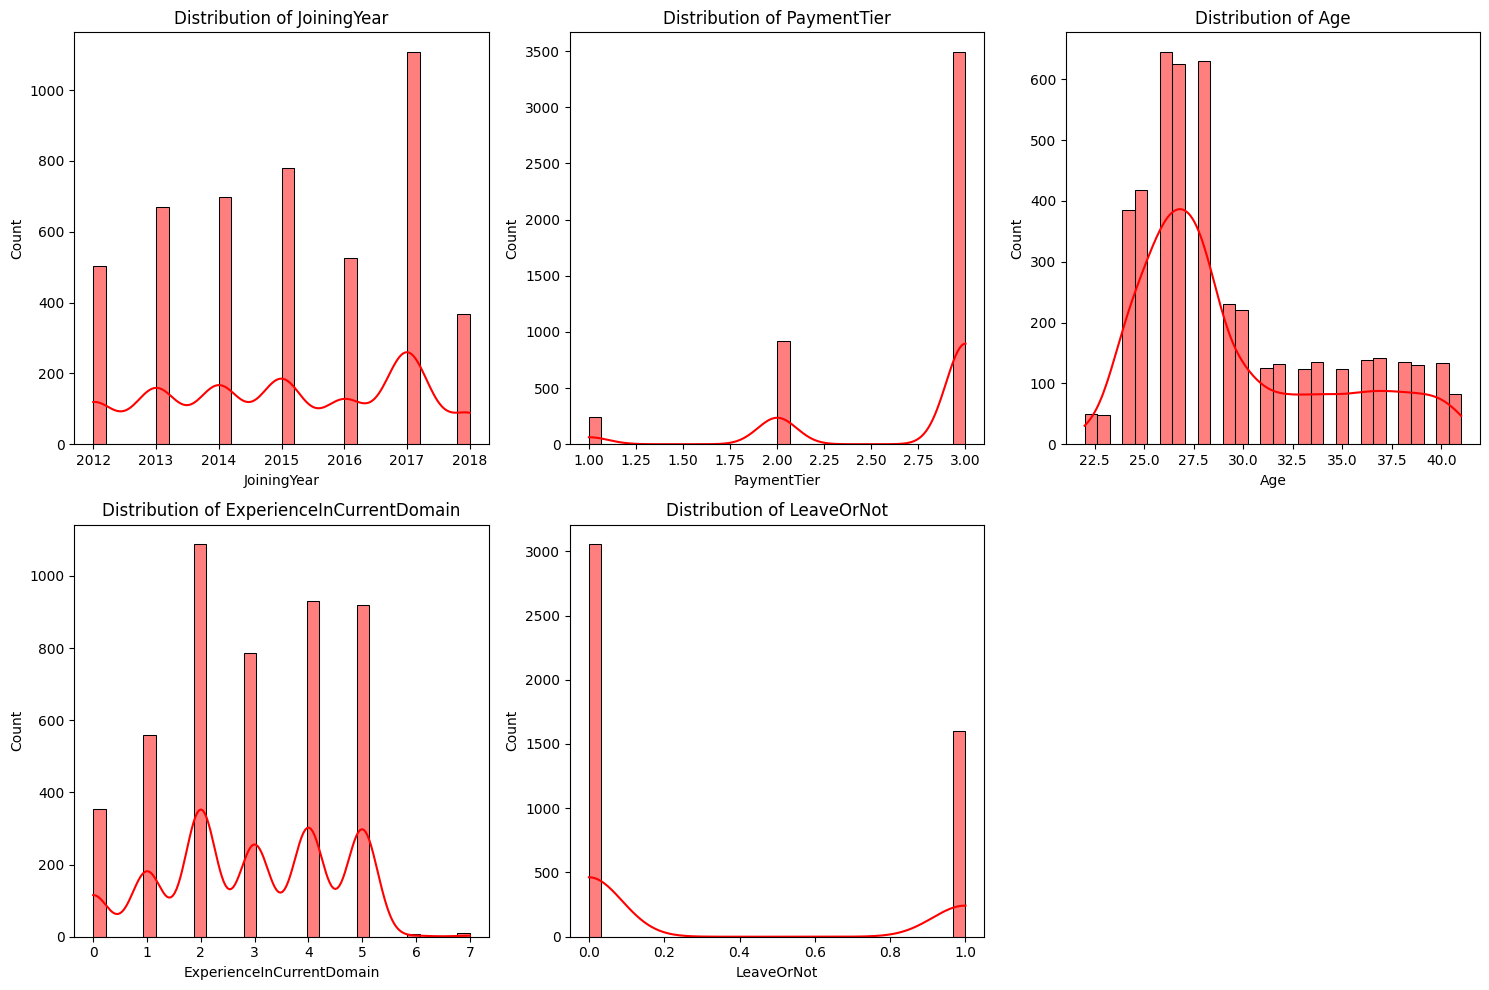

In [44]:
plt.figure(figsize=(15, 10))
for index, column in enumerate(numericalColumns):
    plt.subplot((len(numericalColumns) + 2) // 3, 3, index + 1)
    sns.histplot(df[column], kde=True, bins=30, color='red')
    plt.title(f'Distribution of {column}')
plt.tight_layout()
plt.show()

### 3.3.2 If skewed, fill missing values with the median to reduce the effect of outliers. For symmetric distributions, use the mean for imputation.

In [45]:
for column in numericalColumns:
    if df[column].isnull().sum() > 0:
        skewness = df[column].skew() # There are multiple ways to calculate skewness, but the most common formula is based on the Pearson moment coefficient of skewness.
        if skewness > 1: # Skewed distribution.
            df.fillna({column: df[column].median()}, inplace=True)
        else:
            df.fillna({column: df[column].mean()}, inplace=True)

## 3.4. Validate Null Handling:
### 3.4.1 Recheck the dataset to ensure no missing values remain.

In [46]:
assert df.isnull().sum().sum() == 0

# 4. Outlier Detection and Treatment
## 4.1 Visualize Outliers:
### 4.1.1 Use box plots to detect outliers in numerical columns.

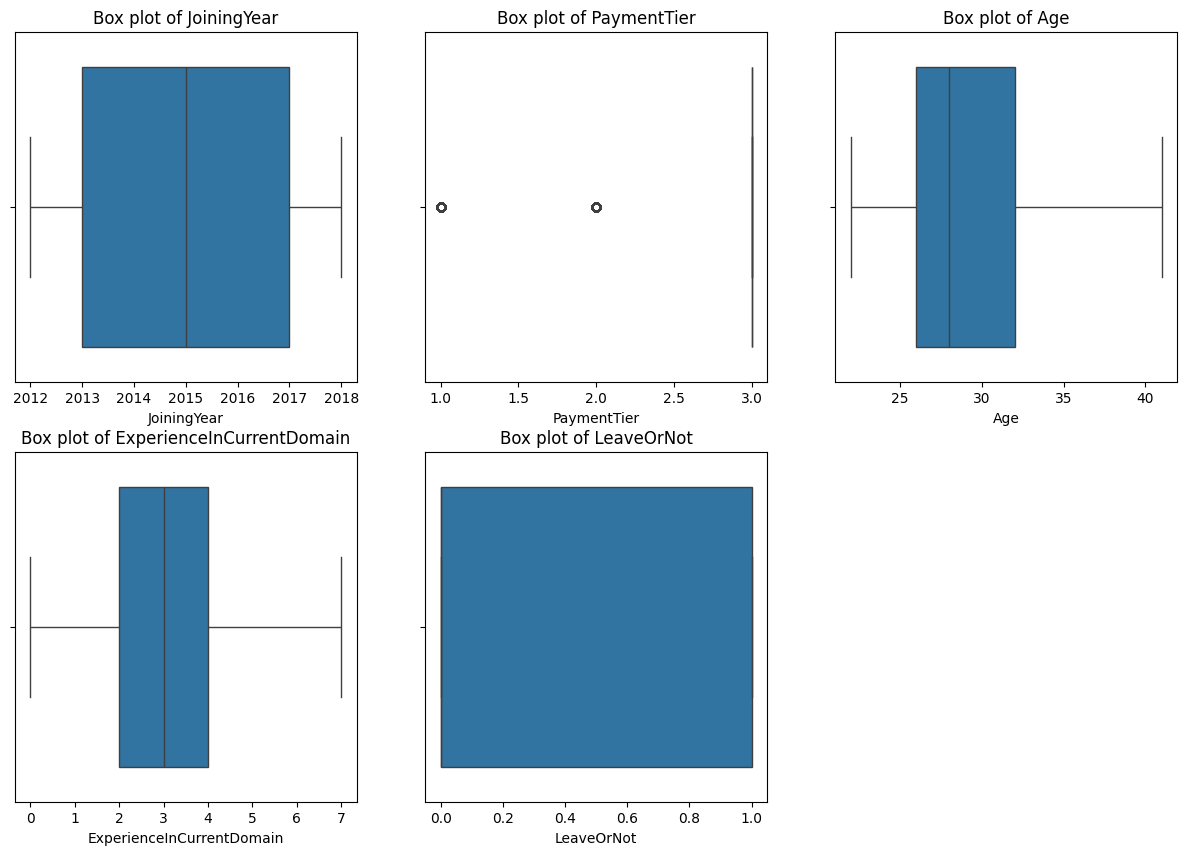

In [47]:
numericalColumns = df.select_dtypes(include=['number']).columns
plt.figure(figsize=(15, 10))
for index, column in enumerate(numericalColumns):
    plt.subplot((len(numericalColumns) + 2) // 3, 3, index + 1)
    sns.boxplot(x=df[column])
    plt.title(f"Box plot of {column}")
plt.show()

## 4.2 Capping Outliers:
### 4.2.1 Replace values above the upper whisker with the maximum non-outlier value (upper bound).
### 4.2.2 Replace values below the lower whisker with the minimum non-outlier value (lower bound).

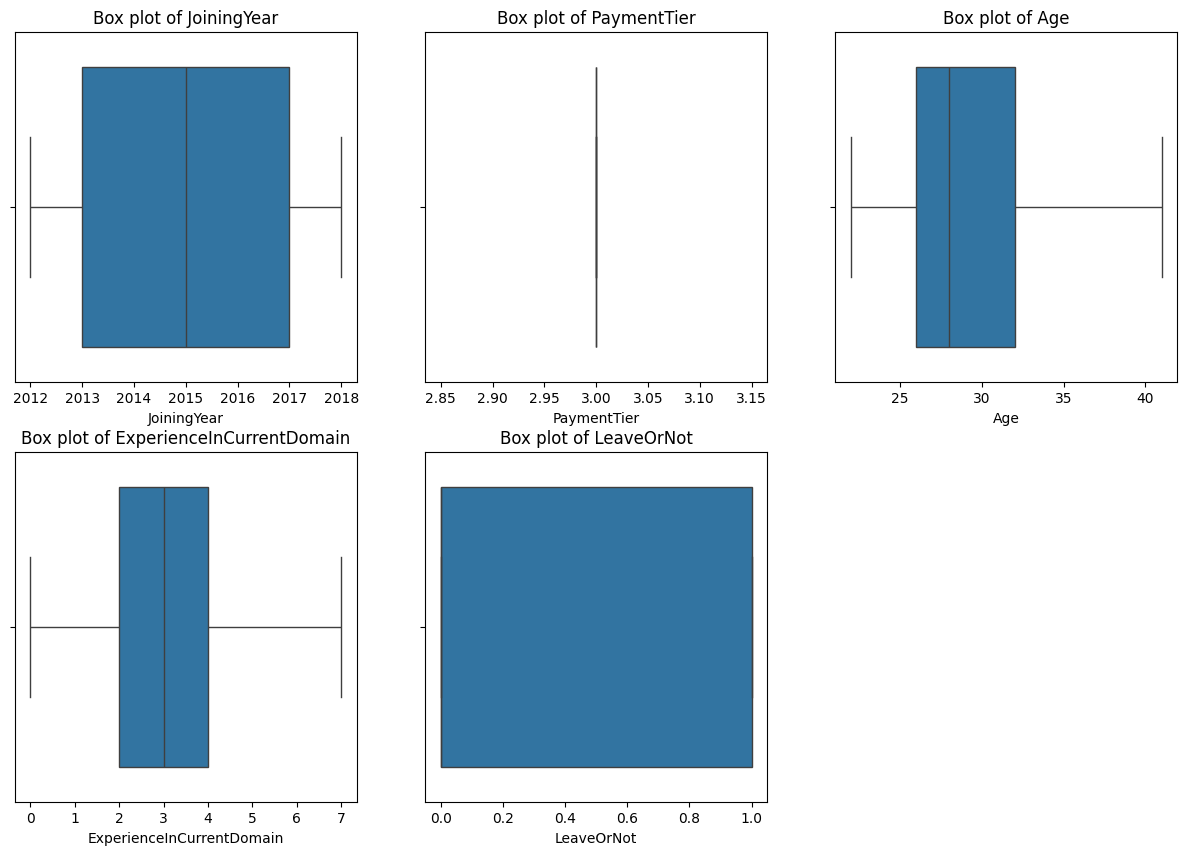

In [48]:
def func(x):
    if x < lowerBound:
        return lowerBound
    if x > upperBound:
        return upperBound
    return x

numericalColumns = df.select_dtypes(include=['number']).columns
for column in numericalColumns:
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lowerBound = Q1 - 1.5 * IQR
    upperBound = Q3 + 1.5 * IQR
    df[column] = df[column].apply(func=func)

plt.figure(figsize=(15, 10))
for index, column in enumerate(numericalColumns):
    plt.subplot((len(numericalColumns) + 2) // 3, 3, index + 1)
    sns.boxplot(x=df[column])
    plt.title(f"Box plot of {column}")
plt.show()

## 4.3 Categorical Outliers:
### 4.3.1 For rare categories (low frequency), replace them with the mode of the column.

In [49]:
categoricalColumns = df.select_dtypes(include=['category']).columns
for column in categoricalColumns:
    ## Returns a Series whose index is the unique values of that column.
    ## The corresponding values are the frequency of each value normalized.
    mode = df[column].mode()[0]
    fp = df[column].value_counts(normalize=True)
    rareCategories = fp[fp < 0.05].index ## Extracts the values with low frequency percentage.
    df[column] = df[column].apply(
        func=lambda x: mode if x in rareCategories else x
    )
df[categoricalColumns] = df[categoricalColumns].astype('category')

# 5. Check for Duplicates

In [50]:
# df.drop_duplicates(inplace=True)
# df.index = np.arange(0, len(df))

# 6. Drop Low-Variance Columns

The variance for each column in a DataFrame is calculated using the **formula for variance**:


$\text{Variance} = \frac{1}{n-1} \sum_{i=1}^{n} (x_i - \bar{x})^2$

Where:
- $n$ is the number of elements in the column.
- $x_i$ are the individual data points in the column.
- $\bar{x}$ is the mean (average) of the column.

Variance measures the spread or dispersion of data points around the mean in a dataset. It provides insights into the variability of the data:
- High variance indicates that data points are spread out widely from the mean.
- Low variance indicates that data points are clustered closely around the mean.

/usr/local/lib/python3.10/dist-packages/scipy/stats/_distn_infrastructure.py:2027: RuntimeWarning: invalid value encountered in divide
  x = np.asarray((x - loc)/scale, dtype=dtyp)


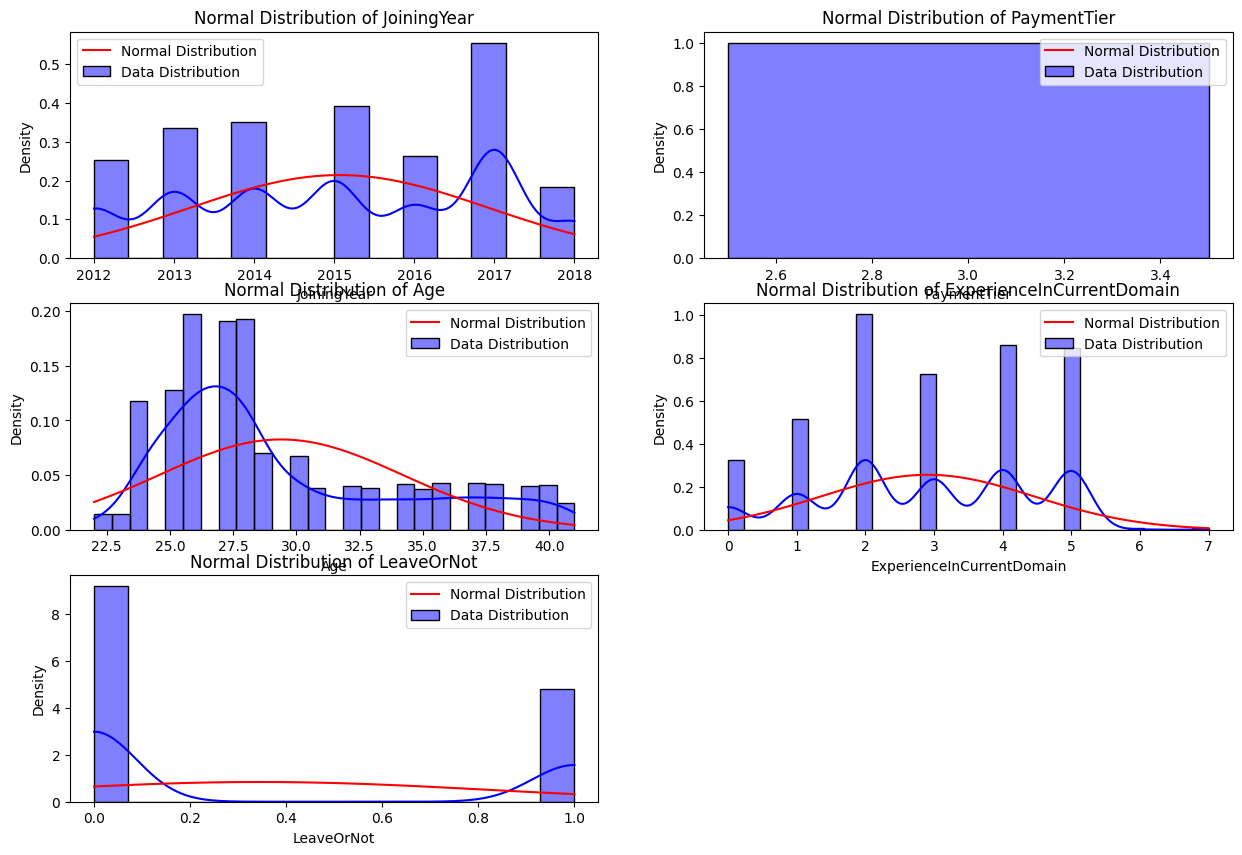

In [51]:
numericalColumns = df.select_dtypes(include=['number']).columns
plt.figure(figsize=(15, 10))
for index, column in enumerate(numericalColumns):
    plt.subplot((len(numericalColumns) + 1) // 2, 2, index + 1)
    sns.histplot(df[column], kde=True, stat="density", color="blue", label="Data Distribution")
    mean = df[column].mean()
    std = df[column].std()
    x = np.linspace(df[column].min(), df[column].max(), 100)
    y = norm.pdf(x, mean, std)
    plt.plot(x, y, color='red', label='Normal Distribution')
    plt.title(f'Normal Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Density')
    plt.legend()
plt.show()

In [52]:
df[numericalColumns].var()

JoiningYear                   3.472173
PaymentTier                   0.000000
Age                          23.291116
ExperienceInCurrentDomain     2.428113
LeaveOrNot                    0.225670
dtype: float64

In [53]:
THRESHOLD = 0.01
variance = df[numericalColumns].var()
df.drop(columns=variance[variance < THRESHOLD].index, inplace=True)
numericalColumns = df.select_dtypes(include=['number']).columns
df[numericalColumns].var()

JoiningYear                   3.472173
Age                          23.291116
ExperienceInCurrentDomain     2.428113
LeaveOrNot                    0.225670
dtype: float64

# 7. Feature and Label Separation

In [54]:
TARGET_COLUMN = 'LeaveOrNot'
X = df.drop(columns=[TARGET_COLUMN])
y = df[TARGET_COLUMN]

In [55]:
X

,Education,JoiningYear,City,Age,Gender,EverBenched,ExperienceInCurrentDomain
0,Bachelors,2017,Bangalore,34,Male,No,0
1,Bachelors,2013,Pune,28,Female,No,3
2,Bachelors,2014,New Delhi,38,Female,No,2
3,Masters,2016,Bangalore,27,Male,No,5
4,Masters,2017,Pune,24,Male,Yes,2
...,...,...,...,...,...,...,...
4648,Bachelors,2013,Bangalore,26,Female,No,4
4649,Masters,2013,Pune,37,Male,No,2
4650,Masters,2018,New Delhi,27,Male,No,5
4651,Bachelors,2012,Bangalore,30,Male,Yes,2


In [56]:
y

0       0
1       1
2       0
3       1
4       1
       ..
4648    0
4649    1
4650    1
4651    0
4652    0
Name: LeaveOrNot, Length: 4653, dtype: int64

# 8. Encoding Categorical Columns
We are going to use three types of encoding techniques:
1. Label encoding
2. One-hot encoding
3. Binary encoding

## Label Encoding
Label encoding is a technique used to convert categorical data into numerical form by assigning a unique integer to each category. It is useful for handling categorical variables that have ordinal or nominal data types.


Label Encoding
What is it? Label encoding is a technique used to convert categorical data into numerical form by assigning a unique integer to each category. It is useful for handling categorical variables that have ordinal or nominal data types.

### Advantages
- Simple and Memory Efficient.
- Preserves Data Shape.

### Disadvantages
- Imposes Ordinality.
- Less Effective for Machine Learning Algorithms.

## One-Hot Encoding
One-hot encoding is a technique to represent categorical data by creating new binary columns for each unique category. Each column represents a category, and for a given row, the value is 1 for the column corresponding to the category and 0 for all other columns.

### Advantages:
- No assumption of ordinal relationships between categories.
- Simple and interpretable.

### Disadvantages:
- Increases the number of features, especially for high-cardinality columns (many unique categories), which can lead to sparsity (many 0s) and high memory usage.
- Inefficient for machine learning algorithms sensitive to high-dimensional data.

## Binary Encoding
Binary encoding combines the benefits of one-hot encoding and label encoding. It represents categories as binary digits, reducing dimensionality compared to one-hot encoding.
- Each category is first assigned a unique integer (as in label encoding).
- The integer is then converted into binary.
- Each binary digit becomes a separate column.

### Advantages:
- Reduces dimensionality compared to one-hot encoding.
- More memory-efficient for high-cardinality columns.
### Disadvantages:
- Introduces a slight ordinal relationship between categories because of the integer-to-binary mapping.

In [57]:
encoder = OneHotEncoder(sparse_output=False)
encoded = encoder.fit_transform(X[categoricalColumns])
X_t = pd.DataFrame(data=encoded, columns=encoder.get_feature_names_out(categoricalColumns))
X_t

,Education_Bachelors,Education_Masters,City_Bangalore,City_New Delhi,City_Pune,Gender_Female,Gender_Male,EverBenched_No,EverBenched_Yes
0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
1,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0
2,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
3,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
4,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...
4648,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
4649,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
4650,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
4651,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0


In [58]:
X = pd.concat([X, X_t], axis=1)
X.drop(columns=categoricalColumns, inplace=True)
X

,JoiningYear,Age,ExperienceInCurrentDomain,Education_Bachelors,Education_Masters,City_Bangalore,City_New Delhi,City_Pune,Gender_Female,Gender_Male,EverBenched_No,EverBenched_Yes
0,2017,34,0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
1,2013,28,3,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0
2,2014,38,2,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
3,2016,27,5,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
4,2017,24,2,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
4648,2013,26,4,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
4649,2013,37,2,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
4650,2018,27,5,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
4651,2012,30,2,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0


# Model Selection

# 1. Read the data

In [59]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# 2. Train the Model

In [60]:
scaler = StandardScaler()
numericalColumns = X_train.select_dtypes(include=['int64', 'float64']).columns
X_train[numericalColumns] = scaler.fit_transform(X_train[numericalColumns])
X_test[numericalColumns] = scaler.fit_transform(X_test[numericalColumns])

In [61]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

# 3. Evaluate the Model

In [62]:
y_pred = model.predict(X_test)

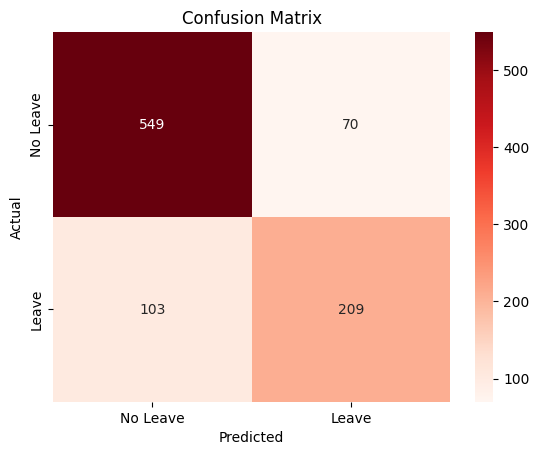

In [63]:
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(
    conf_matrix,
    annot=True,
    fmt='d', cmap='Reds',
    xticklabels=['No Leave', 'Leave'], yticklabels=['No Leave', 'Leave']
)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [64]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.89      0.86       619
           1       0.75      0.67      0.71       312

    accuracy                           0.81       931
   macro avg       0.80      0.78      0.79       931
weighted avg       0.81      0.81      0.81       931



In [65]:
features = pd.Series(model.feature_importances_, index=X_train.columns).sort_values(ascending=False)
features

JoiningYear                  0.345867
Age                          0.204017
ExperienceInCurrentDomain    0.091447
City_Pune                    0.090029
Gender_Male                  0.055647
Gender_Female                0.046668
Education_Masters            0.044406
Education_Bachelors          0.043814
City_Bangalore               0.031199
City_New Delhi               0.031141
EverBenched_Yes              0.007949
EverBenched_No               0.007816
dtype: float64

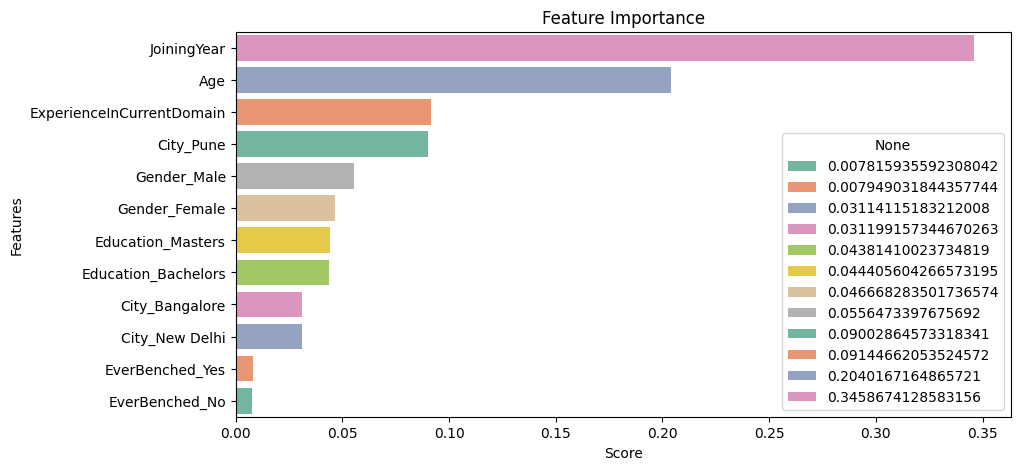

In [66]:
plt.figure(figsize=(10, 5))
sns.barplot(x=features, y=features.index, hue=features, palette='Set2')
plt.title("Feature Importance")
plt.xlabel('Score')
plt.ylabel('Features')
plt.show()